# Using Gradient Descent
Here, I will be trying to implement the famous Gradient Descent algorithm on Boston Housing data from scratch.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [7]:
col_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
boston = pd.read_csv('housing.data', delim_whitespace = True, header = None, names = col_names)
boston.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [15]:
scalar_x = StandardScaler()
scalar_y = StandardScaler()

In [16]:
X = boston.iloc[:, :-1]
y = boston['medv']

In [25]:
X_std = scalar_x.fit_transform(X)
y_std = scalar_y.fit_transform(y.values.reshape(-1, 1)).ravel()

C:\Users\saxen\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saxen\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [68]:
alpha = 0.0001
n = 100
theta = np.zeros(1 + X_std.shape[1])
costs = []


for i in range(n):
    y_pred = np.dot(X_std, theta[1:]) + theta[0]
    error = y_std - y_pred
    
    theta[1:] += alpha * X_std.T.dot(error)
    theta[0] += alpha * error.sum()
    
    cost = (error**2).sum() / 2.0
    costs.append(cost)

Text(0.5, 0, 'Epoch')

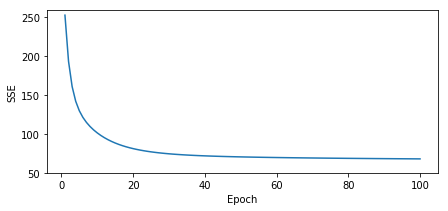

In [75]:
plt.figure(figsize = (7, 3))
plt.plot(range(1 , n+1), costs)
plt.ylabel('SSE')
plt.ylim(50, 260)
plt.xlabel('Epoch')